# Introduction to Scikit-Learn (sklearn)

This notenook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fir the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [3]:
import warnings 
# warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Mar 25 2020, 11:22:43)  [Clang 4.0.1 (tags/RELEASE_401/final)]
executable: /Users/duminicaoctavian/Documents/ML/sample_project/env/bin/python
   machine: macOS-10.15.3-x86_64-i386-64bit

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.1.post20200323
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.2
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [7]:
clf.fit(X_train, y_train);

In [8]:
# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [10]:
y_test

23     1
182    0
10     1
295    0
238    0
      ..
118    1
155    1
210    0
51     1
45     1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.7868852459016393

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[19,  9],
       [ 4, 29]])

In [15]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [16]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 77.05%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 73.77%

Trying model with 40 estimators...
Model accuracy on test set: 75.41%

Trying model with 50 estimators...
Model accuracy on test set: 77.05%

Trying model with 60 estimators...
Model accuracy on test set: 77.05%

Trying model with 70 estimators...
Model accuracy on test set: 77.05%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 77.05%



In [17]:
# 6. Save a model and load it
import pickle 

pickle.dump(clf, open('random_forst_model_1.pkl', 'wb'))

In [18]:
loaded_model = pickle.load(open('random_forst_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7704918032786885

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
X.shape[0] * 0.8

242.4

In [27]:
len(heart_disease)

303

### 1.1. Make sure it's all numerical

In [29]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [32]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [34]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor # this one can predict a number instead of classification

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [37]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [38]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [40]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors'] # Doors is both numerical and categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)],
                                 remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
pd.DataFrame(transformed_X) # Odometer column hasn't been changed, all the rest are hot encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [43]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [48]:
# Import car sales missing data
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [49]:
car_sales_missing.isna().sum() # Very useful, sum of missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [51]:
# Let's try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors'] # Doors is both numerical and categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)],
                                 remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

### Option 1: Fill missing data with Pandas

In [52]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [55]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [56]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [57]:
# Remove rows with missing Price value, as that is the one we want to predict, it has missing label
car_sales_missing.dropna(inplace=True)

In [59]:
len(car_sales_missing)

950

In [60]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [63]:
# Let's try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors'] # Doors is both numerical and categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)],
                                 remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [83]:
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [84]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [85]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [86]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [91]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [93]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [108]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean()
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])
# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [109]:
type(filled_X)

numpy.ndarray

In [110]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [111]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [112]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors'] # Doors is both numerical and categorical
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)],
                                 remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [114]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [115]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### Corrected Option 2

It's best to fill and transform training and test sets separately (as shown in the code below)
The main takeaways:
* Split your data first (into train/test), always keep your training & test data separate
* Fill/transform the training set and test sets separately

In [116]:
# Standard inputs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [117]:
# Check missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [118]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

Note the difference in the following cell to the videos, the data is split into train and test before any filling missing values or transformations take place.

In [119]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.
__Note__: We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only) 

In [121]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set

In [122]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

car_sales_filled_test = pd.DataFrame(filled_X_test, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [123]:
# Check missing data in test set 
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

No more missing values!

In [124]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding. Again, keeping our training and test data separate

In [125]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformer_X_test = transformer.fit_transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

## Fit a model

Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [126]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformer_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [127]:
# Import Boston housing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [129]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [130]:
# How many samples?
len(boston_df)

506

In [131]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168521

How do we improve this score?

What if Ridge wasn't working?

In [134]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
model.score(X_test, y_test)

0.873969014117403

### 2.2 Choosing an estimator for a classification problem

In [135]:
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [138]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/duminicaoctavian/Documents/ML/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.47540983606557374

In [139]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate RandomForestClassfier
clf.score(X_test, y_test)

0.8524590163934426

### IMPORTANT:
1. If you have structured (things in a data frame) data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model for the data
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [144]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate RandomForestClassfier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [141]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [142]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [145]:
# Use a trained model to make predictions
clf.predict(np.array([1, 2, 3, 4, 5, 6]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [146]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [147]:
clf.predict(X_test) 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [149]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [150]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [151]:
clf.score(X_test, y_test)

0.8524590163934426

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [153]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [154]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [155]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` cand also be used for regression models

In [156]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [158]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantitate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [159]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [160]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [161]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function

### 4.1 Evaluating a model with the `score` method

In [162]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
clf.score(X_train, y_train)

1.0

In [164]:
clf.score(X_test, y_test) # Returns the mean accuracy on the test data and given labels

0.8524590163934426

In [165]:
# Let's do the same but for regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantitate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [166]:
model.score(X_test, y_test) # score uses different metrics based on the model, in this case
# coefficient of determination R^2 of the prediction

0.873969014117403

### 4.2 Evaluating a model using the `scoring` parameter

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
clf.score(X_test, y_test)

0.8524590163934426

In [169]:
cross_val_score(clf, X, y) # K-fold

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [170]:
cross_val_score(clf, X, y, cv=10) # K-fold

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [171]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy

In [172]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matri
4. Classification report

**Accuracy**

In [180]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [176]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [177]:
np.mean(cross_val_score)

0.8248087431693989

In [179]:
print(f'Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) * 100: .2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [182]:
# Create X_test ... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [185]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [186]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [189]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

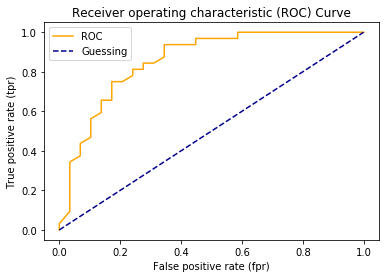

In [190]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [192]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

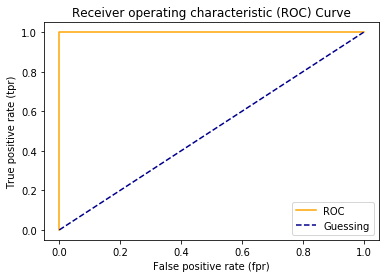

In [193]:
# Plot perfect ROC curve and AUC score 
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [194]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [197]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 8, 24]])

In [198]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Label'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,8,24


In [199]:
22 + 7 + 8 + 24

61

In [201]:
# How to install a conda package into the current environment from the Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/duminicaoctavian/Documents/ML/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.0             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         163 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.0-py_0



seaborn-0.10.0       | 163 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


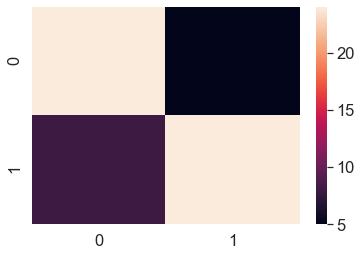

In [203]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

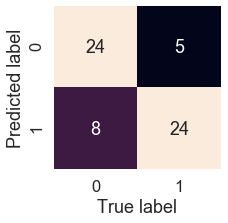

In [205]:
def plot_conf_mat(conf_mat): 
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');
    
plot_conf_mat(conf_mat)

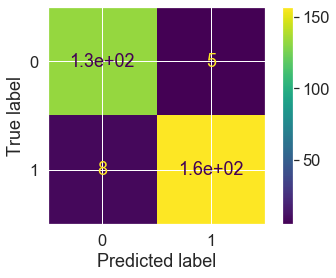

In [207]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report**

In [209]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [214]:
# Where precision and recall become valuable
disease_true = np.zeros(10000) # Massive class imbalance
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/duminicaoctavian/Documents/ML/sample_project/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And your model perfectly predicts a range of numbers its R^2 value would be 1. 

In [215]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [216]:
model.score(X_test, y_test) # R^2 is the default metric

0.873969014117403

In [217]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [218]:
y_test.mean()

21.488235294117644

In [219]:
r2_score(y_test, y_test_mean)

0.0

In [220]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions are.

In [223]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [226]:
df = pd.DataFrame(data={'actual values': y_test, 'predicted values': y_preds})
df['difference'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean squared error (MSE)**

In [227]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [229]:
# Calculate MSE by hand
squared = np.square(df['difference'])
squared.mean()

9.242328990196082

### For regression models you'd want to minimize MSE and MAE while maximizing R^2

### 4.2.3 Finally using the `scoring` parameter

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [234]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [235]:
# Cross validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.02f}%')

The cross-validated accuracy is: 82.48%


In [237]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.02f}%')

The cross-validated accuracy is: 82.48%


In [239]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8209201193072161

In [240]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8484848484848484

In [242]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
np.mean(cv_f1)

0.8256946143361409

How about our regression model?

In [243]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor(n_estimators=100)

In [246]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [247]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
np.mean(cv_r2)

0.622375083951403

In [249]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [253]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error') # WTF
np.mean(cv_mse)

-21.580325026247316

### 4.3 Using different evaluation metrics as Scikit-Learn fuctions

**Classification evaluation functions**

In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)* 100:.02f}%')
print(f'Precision: {precision_score(y_test, y_preds)* 100:.02f}%')
print(f'Recall: {recall_score(y_test, y_preds)* 100:.02f}%')
print(f'F1: {f1_score(y_test, y_preds)* 100:.02f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression evaluation functions**

In [257]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


## 5. Improving a model

First predictions = baseline predictions.  
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters:  
* Parameters = model finds these patterns in data  
* Hyperparameters = settings on a model you can adjust yo (potentially) improve its ability to find patters

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [258]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [259]:
clf.get_params() # List hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [260]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                  'precision': round(precision, 2),
                  'recall': round(recall, 2),
                  'f1': round(f1, 2)}
    print(f'Acc: {accuracy * 100:.02f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [267]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score: 0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [268]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [263]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [269]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [281]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]} # number of combinations 6 * 5 * 2 * 3 * 3

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much of your computer processor do you want to dedicate

# Setup RandomizedSearchCV, automatically makes the validation sets for us
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.4s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.2s finished


In [282]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [283]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [284]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [285]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [286]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much of your computer processor do you want to dedicate

# Setup GridSearchCV, automatically makes the validation sets for us
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   29.6s finished


In [287]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [288]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare out different models metrics.

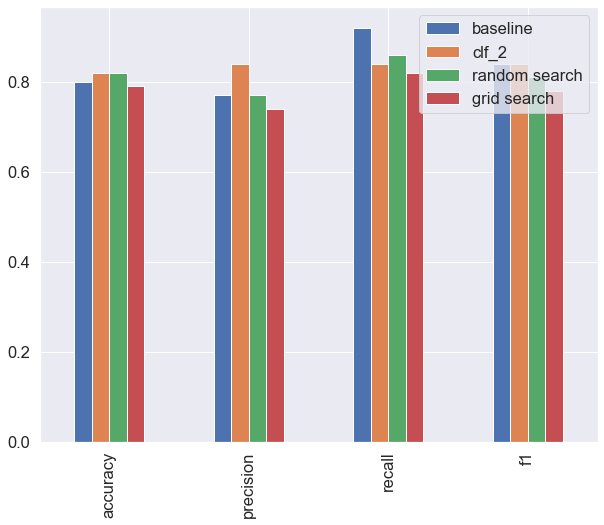

In [290]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [291]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb')) # write binary

In [292]:
# Load a saved model

loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb')) # read binary

In [294]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds);

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


**Joblib**

In [295]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [297]:
# Import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [298]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together!

In [301]:
data = pd.read_csv('./data/car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [302]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [303]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [305]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing data
data = pd.read_csv('./data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipelines
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

# Setup the preprocessing steps (fill missing values then convert to numbers)
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features),
                                               ('door', door_transformer, door_feature),
                                               ('num', numeric_transformer, numeric_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), 
                        ('model', RandomForestRegressor())])

# Split data
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [306]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'model__n_estimators': [100, 1000],
    'model__max_depth': [None, 5],
    'model__max_features': ['auto'],
    'model__min_samples_split': [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   2.0s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [308]:
gs_model.score(X_test, y_test)

0.3339554263158365